Variational quantum computing exploits the advantages of both classical computing and quantum computing. In a very general sense, we propose an initial solution to a problem, called an ansatz. In our case our ansatz will be an ansatz parametrised by a and b. We then prepare our qubits (the quantum equivalent of bits on a normal computer) and test how good the ansatz is, using the quantum computer. Testing the ansatz equates to minimising a cost function. We feed the result of this cost function back to the classical computer, and use some classical optimisers to improve on our ansatz, i.e. our initial guesses for a and b. We repeat this process until the ansatz is good enough within some tolerance.

https://qiskit.org/textbook/ch-demos/variational-quantum-regression.html

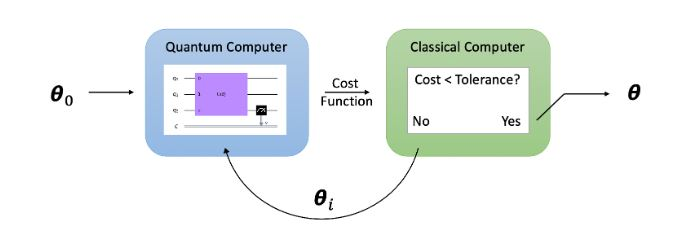

***This algorithm has no known advantage over the most widely-used classical algorithm (Least Squares Method), but does nicely demonstrate the different elements of variational quantum algorithms.

In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.3 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=c6407cd673a045650ec659bea6ee4ca196f727c64d0278da6e0d0965e7770a35
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import pylatexenc
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#inner product

In [ ]:
def inner_prod_norm_output(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')
    N = len(vec1)
    nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

    xnorm = np.linalg.norm(vec1)           #sqrt(0^2+1^2+3^2+4^2+5^2+6^2+7^2)        # normalise vectors x and y
    ynorm = np.linalg.norm(vec2)
    vec1 = vec1/xnorm
    vec2= vec2/ynorm
    circ = QuantumCircuit(2*nqubits+1,1)
    circ.h(0)   # create circuit
    circ.initialize(vec1,qubits=range(1,nqubits+1))
    circ.initialize(vec2,range(nqubits+1,2*nqubits+1))
    for i in range(1,nqubits+1):
      circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
    circ.h(0)
    circ.measure(qubit=0,cbit=0)
    shut_number=1000
    job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

    count = job.result().get_counts(circ)
    dot=np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number

    return dot


def inner_prod_innorm_output(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')
    N = len(vec1)
    nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

    xnorm = np.linalg.norm(vec1)           #sqrt(0^2+1^2+3^2+4^2+5^2+6^2+7^2)        # normalise vectors x and y
    ynorm = np.linalg.norm(vec2)
    vec1 = vec1/xnorm
    vec2= vec2/ynorm
    circ = QuantumCircuit(2*nqubits+1,1)
    circ.h(0)   # create circuit
    circ.initialize(vec1,qubits=range(1,nqubits+1))
    circ.initialize(vec2,range(nqubits+1,2*nqubits+1))
    for i in range(1,nqubits+1):
      circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
    circ.h(0)
    circ.measure(qubit=0,cbit=0)
    shut_number=1000
    job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

    count = job.result().get_counts(circ)
    dot=xnorm*ynorm*np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number

    return dot




In [ ]:
vec1 = np.array([1,0,2,3])
vec2= np.array([0,1,3,1])


print("vec1: ", vec1)
print()
print("vec1: ", vec2)
print()


N = len(vec1)
nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

xnorm = np.linalg.norm(vec1)           #sqrt(0^2+1^2+3^2+4^2+5^2+6^2+7^2)        # normalise vectors x and y
ynorm = np.linalg.norm(vec2)
vec1 = vec1/xnorm
vec2= vec2/ynorm

vec1:  [1 0 2 3]

vec1:  [0 1 3 1]



The inner product of x and y equals:  8.91425824171591


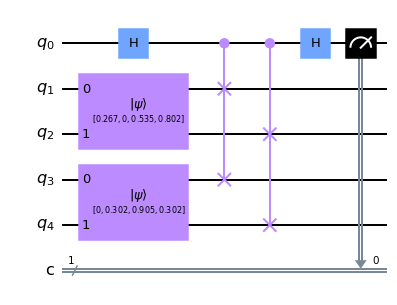

In [ ]:


circ = QuantumCircuit(2*nqubits+1,1)
circ.h(0)   # create circuit
circ.initialize(vec1,qubits=range(1,nqubits+1))
circ.initialize(vec2,range(nqubits+1,2*nqubits+1))
for i in range(1,nqubits+1):
  circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
circ.h(0)
circ.measure(qubit=0,cbit=0)
shut_number=1000
job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

count = job.result().get_counts(circ)
dot=xnorm*ynorm*np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number


print("The inner product of x and y equals: ", dot)
circ.draw(output='mpl')

#cost function

In [ ]:
def calculate_cost_function(parameters):

    a, b = parameters

    ansatz = a*x + b                        # compute ansatz
    ansatzNorm = np.linalg.norm(ansatz)     # normalise ansatz

    ansatz = ansatz/ansatzNorm
    print(ansatz)


    y_ansatz = ansatzNorm/ynorm * inner_prod_norm_output(y,ansatz)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    return (1-y_ansatz)**2


In [ ]:
#first set up the data sets x and y

x = np.arange(0,8,1)
y = x   # + [random.uniform(-1,1) for p in range(8)]    # can add noise here
N = len(x)
nqubits = math.ceil(np.log2(N))

ynorm = np.linalg.norm(y)      # normalise the y data set
y = y/ynorm



In [ ]:
a=1
b=2
print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function((a,b)))

Cost function for a = 1 and b = 2 equals: 0.16337585203921318


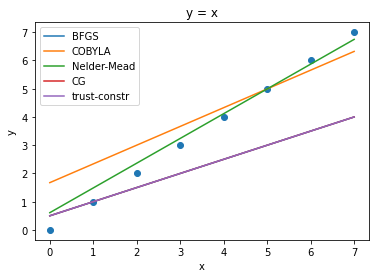

In [ ]:
#first set up the data sets x and y

x = np.arange(0,8,1)
y = x   # + [random.uniform(-1,1) for p in range(8)]    # can add noise here
N = len(x)
nqubits = math.ceil(np.log2(N))

ynorm = np.linalg.norm(y)      # normalise the y data set
y = y/ynorm

x0 = [0.5,0.5]                 # initial guess for a and b

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

out_a1 = out1['x'][0]
out_b1 = out1['x'][1]

out_a = out['x'][0]
out_b = out['x'][1]

out_a2 = out2['x'][0]
out_b2 = out2['x'][1]

out_a3 = out3['x'][0]
out_b3 = out3['x'][1]

out_a4 = out4['x'][0]
out_b4 = out4['x'][1]

plt.scatter(x,y*ynorm)
xfit = np.linspace(min(x), max(x), 100)
plt.plot(xfit, out_a*xfit+out_b, label='BFGS')
plt.plot(xfit, out_a1*xfit+out_b1, label='COBYLA')
plt.plot(xfit, out_a2*xfit+out_b2, label='Nelder-Mead')
plt.plot(xfit, out_a3*xfit+out_b3, label='CG')
plt.plot(xfit, out_a4*xfit+out_b4, label='trust-constr')
plt.legend()
plt.title("y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#general form

In [ ]:
def calculate_cost_function_n(parameters):

    ansatz = parameters[0]  #a0                 # compute ansatz

    for i in range(1,len(parameters)): #a1,a2,a3,...

        ansatz += parameters[i] * x**i

    ansatzNorm = np.linalg.norm(ansatz)      # normalise ansatz
    ansatz = ansatz/ansatzNorm
    y_ansatz = ansatzNorm/ynorm * inner_prod_norm_output(y,ansatz)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors

    return (1-y_ansatz)**2

x0:  [1.421523798667496, 0.874345014551186, 0.3442541088677882]


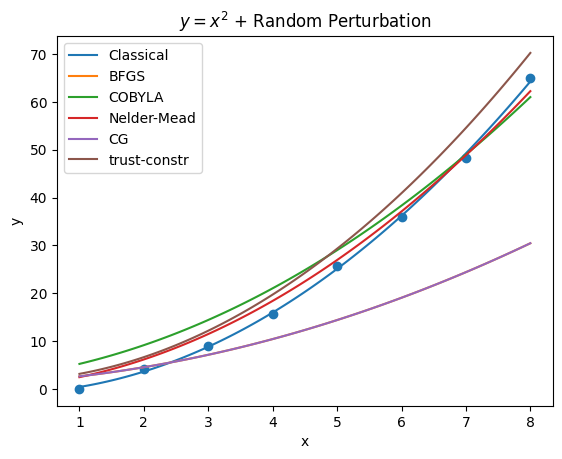

In [ ]:
x = np.array([1,2,3],4,5,6,7,8])
y = x**2 + [random.uniform(-1,1) for p in range(len(x))]
N = len(x)
nqubits = math.ceil(np.log2(N))

ynorm = np.linalg.norm(y)       #normalise y data set
y = y/ynorm

order = 2

x0 = [random.uniform(0,2) for p in range(order+1)]
print("x0: ",x0)    #random initial guess for a and b

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function_n, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function_n, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function_n, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function_n, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function_n, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

class_fit = np.polyfit(x,y*ynorm,order)
class_fit = class_fit[::-1]

xfit = np.linspace(min(x), max(x), 100)

#draw fited line
def return_fits(xfit):
    c_fit = np.zeros(100)
    q_fit = np.zeros(100)
    q_fit1 = np.zeros(100)
    q_fit2 = np.zeros(100)
    q_fit3 = np.zeros(100)
    q_fit4 = np.zeros(100)
    for i in range(order+1):
        c_fit += xfit**i*class_fit[i]
        q_fit += xfit**i*out['x'][i]
        q_fit1 += xfit**i*out1['x'][i]
        q_fit2 += xfit**i*out2['x'][i]
        q_fit3 += xfit**i*out3['x'][i]
        q_fit4 += xfit**i*out4['x'][i]


    return c_fit, q_fit, q_fit1, q_fit2, q_fit3, q_fit4

c_fit, q_fit, q_fit1, q_fit2, q_fit3, q_fit4 = return_fits(xfit)

plt.scatter(x,y*ynorm)
xfit = np.linspace(min(x), max(x), 100)
plt.plot(xfit, c_fit, label='Classical')
plt.plot(xfit, q_fit, label='BFGS')
plt.plot(xfit, q_fit1, label='COBYLA')
plt.plot(xfit, q_fit2, label='Nelder-Mead')
plt.plot(xfit, q_fit3, label='CG')
plt.plot(xfit, q_fit4, label='trust-constr')
plt.legend()
plt.title("$y = x^2$ + Random Perturbation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

chekpoint

[3.04063519 3.75558907]


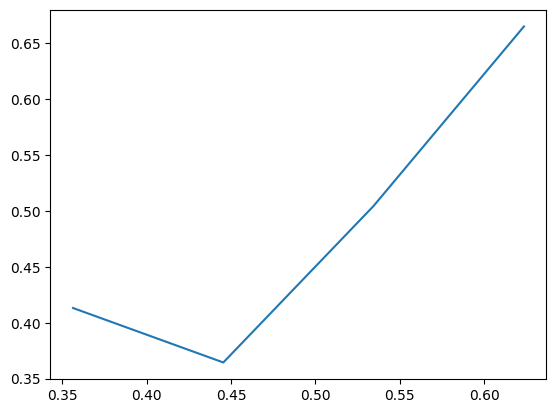

In [ ]:

x = np.array([4,5,6,7])
y = x + [random.uniform(-1,1) for p in range(len(x))]
N = len(x)
nqubits = math.ceil(np.log2(N))

ynorm = np.linalg.norm(y)       #normalise y data set
y = y/ynorm

xnorm = np.linalg.norm(x)       #normalise y data set
x = x/xnorm
plt.plot(x,y)
theta_init=np.random.random(size=nqubits)*2*np.pi
print(theta_init)

In [ ]:
N = len(x_test)
nqubits = math.ceil(np.log2(N))


norm = np.linalg.norm(x_test)
x_test_norm  = x_test /norm



circ = QuantumCircuit(nqubits)
circ.initialize(x_test_norm,qubits=range(0,nqubits))
for j,theta in zip(np.arange(0,nqubits),theta_optimized):
  circ.ry(theta,j)
circ.measure(qubit=0,cbit=0)
shut_number=1000
job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

count = job.result().get_counts(circ)

The inner product of x and y equals:  653.378162894146


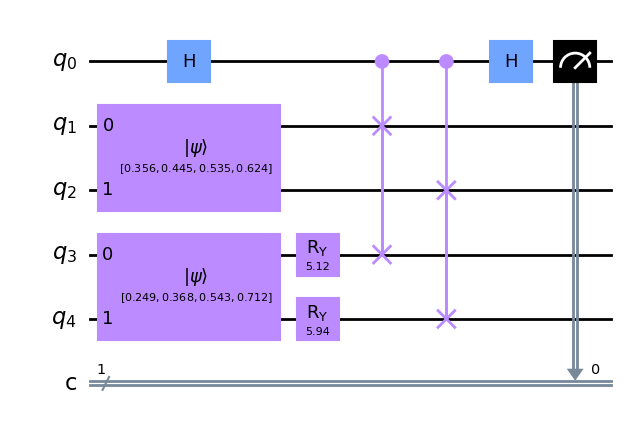

In [ ]:
circ = QuantumCircuit(2*nqubits+1,1)
circ.h(0)   # create circuit
circ.initialize(x,qubits=range(1,nqubits+1))
circ.initialize(y,range(nqubits+1,2*nqubits+1))
for j,theta in zip(np.arange(nqubits+1,2*nqubits+1),theta_init):
  circ.ry(theta,j)
for i in range(1,nqubits+1):
  circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
circ.h(0)
circ.measure(qubit=0,cbit=0)
shut_number=1000
job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

count = job.result().get_counts(circ)
dot=xnorm*ynorm*np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number


print("The inner product of x and y equals: ", dot)
circ.draw(output='mpl')

In [ ]:
def calculate_cost_function_n(theta_ini):
    #first check lengths are equal
    x = np.array([4,5,6,7])
    y = x+2
    print(x,y)
    N = len(x)
    nqubits = math.ceil(np.log2(N))

    ynorm = np.linalg.norm(y)       #normalise y data set
    y = y/ynorm

    xnorm = np.linalg.norm(x)       #normalise y data set
    x = x/xnorm



    circ = QuantumCircuit(2*nqubits+1,1)
    circ.h(0)   # create circuit
    circ.initialize(x,qubits=range(1,nqubits+1))
    circ.initialize(y,range(nqubits+1,2*nqubits+1))
    for j,theta in zip(np.arange(nqubits+1,2*nqubits+1),theta_init):
      circ.ry(theta,j)
    for i in range(1,nqubits+1):
      circ.cswap(control_qubit=0,target_qubit1=i,target_qubit2=nqubits+i)
    circ.h(0)
    circ.measure(qubit=0,cbit=0)
    shut_number=1000
    job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

    count = job.result().get_counts(circ)
    dot=np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number


    return (1-dot)**2


def test(x_test,theta_optimized):
  #first check lengths are equal

    N = len(x_test)
    nqubits = math.ceil(np.log2(N))


    norm = np.linalg.norm(x_test)
    x_test_norm  = x_test /norm



    circ = QuantumCircuit(nqubits)
    circ.initialize(x_test_norm,qubits=range(0,nqubits))
    for j,theta in zip(np.arange(0,nqubits),theta_optimized):
      circ.ry(theta,j)
    circ.measure(qubit=0,cbit=0)
    shut_number=1000
    job = execute(circ, backend=Aer.get_backend('qasm_simulator'),shots=shut_number)

    count = job.result().get_counts(circ)
    return count

In [ ]:
out  =  minimize(calculate_cost_function_n,  x0=theta_init, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function_n, x0=theta_init, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function_n, x0=theta_init, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function_n, x0=theta_init, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function_n, x0=theta_init, method="trust-constr", options={'maxiter':200}, tol=1e-6)

[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]


<ipython-input-51-56f696a670b0>:31: RuntimeWarning: invalid value encountered in sqrt
  dot=np.sqrt(2*(count["0"]/shut_number)-1)  #2*p(0)-1   p(0)=number(0)/shut_number


[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]
[4 5 6 7] [6 7 8 9]


In [ ]:
out2['x']

array([3.07903286, 3.80209841])